In [2]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.utils import to_categorical
from keras.preprocessing import image
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from tqdm import tqdm
%matplotlib inline

Using TensorFlow backend.


In [5]:
train = pd.read_csv('train.csv')
train.head()

,Id,Genre,Action,Adventure,Animation,Biography,Comedy,Crime,Documentary,Drama,...,N/A,News,Reality-TV,Romance,Sci-Fi,Short,Sport,Thriller,War,Western
0,tt0086425,"['Comedy', 'Drama']",0,0,0,0,1,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1,tt0085549,"['Drama', 'Romance', 'Music']",0,0,0,0,0,0,0,1,...,0,0,0,1,0,0,0,0,0,0
2,tt0086465,['Comedy'],0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,tt0086567,"['Sci-Fi', 'Thriller']",0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,1,0,0
4,tt0086034,"['Action', 'Adventure', 'Thriller']",1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [3]:
train.columns[2:]

Index(['Action', 'Adventure', 'Animation', 'Biography', 'Comedy', 'Crime',
       'Documentary', 'Drama', 'Family', 'Fantasy', 'History', 'Horror',
       'Music', 'Musical', 'Mystery', 'N/A', 'News', 'Reality-TV', 'Romance',
       'Sci-Fi', 'Short', 'Sport', 'Thriller', 'War', 'Western'],
      dtype='object')

In [4]:
train_image = []
for i in tqdm(range(train.shape[0])):
    img = image.load_img('Images/'+train['Id'][i]+'.jpg',target_size=(250,250,3))
    img = image.img_to_array(img)
    img = img/255
    train_image.append(img)
X = np.array(train_image)

100%|██████████| 7254/7254 [00:12<00:00, 591.01it/s]


In [5]:
X.shape

(7254, 250, 250, 3)

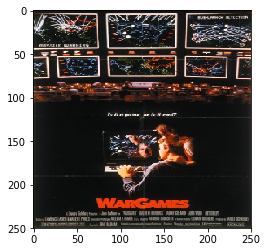

In [6]:
plt.imshow(X[3])

In [8]:
train['Genre'][3]

"['Sci-Fi', 'Thriller']"

In [9]:
y = np.array(train.drop(['Id', 'Genre'],axis=1))
y.shape

(7254, 25)

In [14]:
X_train, X_val, y_train, y_val = train_test_split(X, y, random_state=42, test_size=0.2)

In [10]:
model = Sequential()
model.add(Conv2D(filters=16, kernel_size=(5, 5), activation="relu", input_shape=(250,250,3)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Conv2D(filters=32, kernel_size=(5, 5), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Conv2D(filters=64, kernel_size=(5, 5), activation="relu"))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Conv2D(filters=64, kernel_size=(5, 5), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(25, activation='sigmoid'))

In [11]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 246, 246, 16)      1216      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 123, 123, 16)      0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 123, 123, 16)      0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 119, 119, 32)      12832     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 59, 59, 32)        0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 59, 59, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 55, 55, 64)        51264     
__________

In [12]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [15]:
model.fit(X_train, y_train, epochs=10, validation_data=(X_val, y_val), batch_size=64)

Train on 5803 samples, validate on 1451 samples
Epoch 1/10
5803/5803 [==============================] - ETA: 8:15 - loss: 0.7090 - acc: 0.494 - ETA: 4:10 - loss: 0.6882 - acc: 0.541 - ETA: 2:48 - loss: 0.6723 - acc: 0.572 - ETA: 2:07 - loss: 0.6518 - acc: 0.601 - ETA: 1:43 - loss: 0.6402 - acc: 0.618 - ETA: 1:26 - loss: 0.6334 - acc: 0.627 - ETA: 1:14 - loss: 0.6264 - acc: 0.638 - ETA: 1:05 - loss: 0.6199 - acc: 0.646 - ETA: 58s - loss: 0.6143 - acc: 0.655 - ETA: 53s - loss: 0.6086 - acc: 0.66 - ETA: 48s - loss: 0.6030 - acc: 0.66 - ETA: 44s - loss: 0.5956 - acc: 0.67 - ETA: 41s - loss: 0.5897 - acc: 0.68 - ETA: 38s - loss: 0.5840 - acc: 0.68 - ETA: 36s - loss: 0.5781 - acc: 0.69 - ETA: 34s - loss: 0.5744 - acc: 0.69 - ETA: 32s - loss: 0.5692 - acc: 0.70 - ETA: 30s - loss: 0.5649 - acc: 0.70 - ETA: 28s - loss: 0.5613 - acc: 0.70 - ETA: 27s - loss: 0.5558 - acc: 0.71 - ETA: 26s - loss: 0.5514 - acc: 0.71 - ETA: 25s - loss: 0.5473 - acc: 0.72 - ETA: 23s - loss: 0.5440 - acc: 0.72 - ETA: 

5803/5803 [==============================] - ETA: 10s - loss: 0.2707 - acc: 0.90 - ETA: 10s - loss: 0.2769 - acc: 0.90 - ETA: 10s - loss: 0.2826 - acc: 0.90 - ETA: 9s - loss: 0.2792 - acc: 0.9025 - ETA: 9s - loss: 0.2761 - acc: 0.904 - ETA: 9s - loss: 0.2771 - acc: 0.903 - ETA: 9s - loss: 0.2773 - acc: 0.904 - ETA: 9s - loss: 0.2794 - acc: 0.903 - ETA: 9s - loss: 0.2787 - acc: 0.903 - ETA: 9s - loss: 0.2755 - acc: 0.904 - ETA: 9s - loss: 0.2747 - acc: 0.905 - ETA: 9s - loss: 0.2738 - acc: 0.905 - ETA: 9s - loss: 0.2725 - acc: 0.905 - ETA: 9s - loss: 0.2719 - acc: 0.905 - ETA: 8s - loss: 0.2709 - acc: 0.904 - ETA: 8s - loss: 0.2724 - acc: 0.904 - ETA: 8s - loss: 0.2717 - acc: 0.904 - ETA: 8s - loss: 0.2719 - acc: 0.904 - ETA: 8s - loss: 0.2719 - acc: 0.904 - ETA: 8s - loss: 0.2724 - acc: 0.904 - ETA: 8s - loss: 0.2721 - acc: 0.904 - ETA: 8s - loss: 0.2729 - acc: 0.904 - ETA: 7s - loss: 0.2726 - acc: 0.904 - ETA: 7s - loss: 0.2727 - acc: 0.904 - ETA: 7s - loss: 0.2732 - acc: 0.904 - ETA:

5803/5803 [==============================] - ETA: 14s - loss: 0.2556 - acc: 0.90 - ETA: 12s - loss: 0.2712 - acc: 0.90 - ETA: 11s - loss: 0.2714 - acc: 0.90 - ETA: 10s - loss: 0.2689 - acc: 0.90 - ETA: 10s - loss: 0.2668 - acc: 0.90 - ETA: 10s - loss: 0.2654 - acc: 0.90 - ETA: 10s - loss: 0.2656 - acc: 0.90 - ETA: 9s - loss: 0.2634 - acc: 0.9037 - ETA: 9s - loss: 0.2643 - acc: 0.904 - ETA: 9s - loss: 0.2637 - acc: 0.904 - ETA: 9s - loss: 0.2638 - acc: 0.904 - ETA: 9s - loss: 0.2632 - acc: 0.905 - ETA: 9s - loss: 0.2621 - acc: 0.905 - ETA: 9s - loss: 0.2625 - acc: 0.905 - ETA: 9s - loss: 0.2615 - acc: 0.905 - ETA: 9s - loss: 0.2609 - acc: 0.905 - ETA: 9s - loss: 0.2603 - acc: 0.905 - ETA: 9s - loss: 0.2598 - acc: 0.905 - ETA: 9s - loss: 0.2589 - acc: 0.905 - ETA: 8s - loss: 0.2595 - acc: 0.905 - ETA: 8s - loss: 0.2593 - acc: 0.905 - ETA: 8s - loss: 0.2586 - acc: 0.905 - ETA: 8s - loss: 0.2584 - acc: 0.905 - ETA: 8s - loss: 0.2572 - acc: 0.906 - ETA: 8s - loss: 0.2569 - acc: 0.906 - ETA:

5803/5803 [==============================] - ETA: 10s - loss: 0.2562 - acc: 0.90 - ETA: 10s - loss: 0.2620 - acc: 0.90 - ETA: 10s - loss: 0.2553 - acc: 0.90 - ETA: 10s - loss: 0.2504 - acc: 0.90 - ETA: 10s - loss: 0.2504 - acc: 0.90 - ETA: 11s - loss: 0.2525 - acc: 0.90 - ETA: 10s - loss: 0.2509 - acc: 0.90 - ETA: 10s - loss: 0.2524 - acc: 0.90 - ETA: 10s - loss: 0.2520 - acc: 0.90 - ETA: 10s - loss: 0.2517 - acc: 0.90 - ETA: 10s - loss: 0.2511 - acc: 0.90 - ETA: 9s - loss: 0.2504 - acc: 0.9078 - ETA: 9s - loss: 0.2507 - acc: 0.907 - ETA: 9s - loss: 0.2518 - acc: 0.907 - ETA: 9s - loss: 0.2524 - acc: 0.907 - ETA: 9s - loss: 0.2511 - acc: 0.908 - ETA: 9s - loss: 0.2517 - acc: 0.907 - ETA: 9s - loss: 0.2513 - acc: 0.907 - ETA: 8s - loss: 0.2513 - acc: 0.908 - ETA: 8s - loss: 0.2509 - acc: 0.907 - ETA: 8s - loss: 0.2512 - acc: 0.907 - ETA: 8s - loss: 0.2505 - acc: 0.908 - ETA: 8s - loss: 0.2517 - acc: 0.907 - ETA: 8s - loss: 0.2524 - acc: 0.907 - ETA: 8s - loss: 0.2521 - acc: 0.908 - ETA:

5803/5803 [==============================] - ETA: 9s - loss: 0.2525 - acc: 0.906 - ETA: 9s - loss: 0.2494 - acc: 0.905 - ETA: 9s - loss: 0.2462 - acc: 0.905 - ETA: 9s - loss: 0.2423 - acc: 0.908 - ETA: 9s - loss: 0.2444 - acc: 0.909 - ETA: 9s - loss: 0.2416 - acc: 0.910 - ETA: 9s - loss: 0.2431 - acc: 0.909 - ETA: 9s - loss: 0.2459 - acc: 0.908 - ETA: 9s - loss: 0.2448 - acc: 0.909 - ETA: 9s - loss: 0.2436 - acc: 0.909 - ETA: 9s - loss: 0.2466 - acc: 0.908 - ETA: 8s - loss: 0.2462 - acc: 0.908 - ETA: 8s - loss: 0.2477 - acc: 0.907 - ETA: 8s - loss: 0.2481 - acc: 0.908 - ETA: 8s - loss: 0.2486 - acc: 0.907 - ETA: 8s - loss: 0.2493 - acc: 0.907 - ETA: 8s - loss: 0.2494 - acc: 0.907 - ETA: 8s - loss: 0.2493 - acc: 0.907 - ETA: 8s - loss: 0.2501 - acc: 0.907 - ETA: 8s - loss: 0.2500 - acc: 0.907 - ETA: 7s - loss: 0.2495 - acc: 0.907 - ETA: 7s - loss: 0.2497 - acc: 0.908 - ETA: 7s - loss: 0.2499 - acc: 0.908 - ETA: 7s - loss: 0.2502 - acc: 0.907 - ETA: 7s - loss: 0.2499 - acc: 0.907 - ETA: 

Drama (0.518)
Action (0.288)
Thriller (0.244)


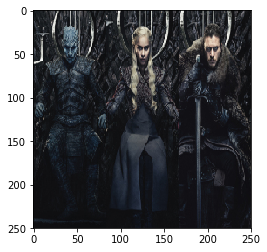

In [16]:
img = image.load_img('GOT.jpg',target_size=(250,250,3))
img = image.img_to_array(img)
img = img/255

classes = np.array(train.columns[2:])
proba = model.predict(img.reshape(1,250,250,3))
top_3 = np.argsort(proba[0])[:-4:-1]
for i in range(3):
    print("{}".format(classes[top_3[i]])+" ({:.3})".format(proba[0][top_3[i]]))
plt.imshow(img)

In [17]:
img = image.load_img('avengers.jpeg',target_size=(250,250,3))
img = image.img_to_array(img)
img = img/255

Drama (0.518)
Action (0.284)
Thriller (0.236)


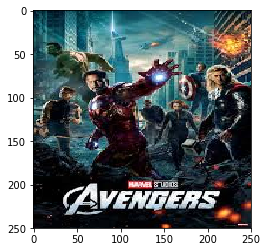

In [18]:
classes = np.array(train.columns[2:])
proba = model.predict(img.reshape(1,250,250,3))
top_3 = np.argsort(proba[0])[:-4:-1]
for i in range(3):
    print("{}".format(classes[top_3[i]])+" ({:.3})".format(proba[0][top_3[i]]))
plt.imshow(img)

In [19]:
img = image.load_img('IT.jpg',target_size=(250,250,3))
img = image.img_to_array(img)
img = img/255

Drama (0.518)
Action (0.285)
Thriller (0.241)


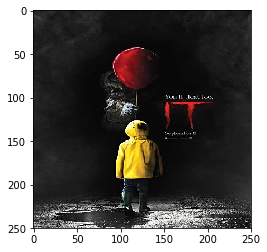

In [20]:
classes = np.array(train.columns[2:])
proba = model.predict(img.reshape(1,250,250,3))
top_3 = np.argsort(proba[0])[:-4:-1]
for i in range(3):
    print("{}".format(classes[top_3[i]])+" ({:.3})".format(proba[0][top_3[i]]))
plt.imshow(img)

In [21]:
img = image.load_img('IT2.jpg',target_size=(250,250,3))
img = image.img_to_array(img)
img = img/255

Drama (0.518)
Action (0.287)
Thriller (0.243)


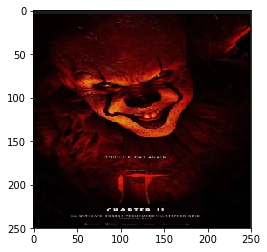

In [22]:
classes = np.array(train.columns[2:])
proba = model.predict(img.reshape(1,250,250,3))
top_3 = np.argsort(proba[0])[:-4:-1]
for i in range(3):
    print("{}".format(classes[top_3[i]])+" ({:.3})".format(proba[0][top_3[i]]))
plt.imshow(img)

In [23]:
img = image.load_img('TS4.jpg',target_size=(250,250,3))
img = image.img_to_array(img)
img = img/255

Drama (0.518)
Action (0.252)
Comedy (0.236)


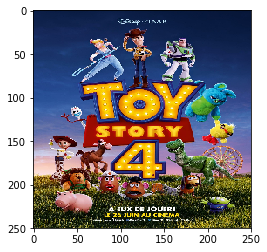

In [24]:
classes = np.array(train.columns[2:])
proba = model.predict(img.reshape(1,250,250,3))
top_3 = np.argsort(proba[0])[:-4:-1]
for i in range(3):
    print("{}".format(classes[top_3[i]])+" ({:.3})".format(proba[0][top_3[i]]))
plt.imshow(img)

In [25]:
img = image.load_img('Rec.jpg',target_size=(250,250,3))
img = image.img_to_array(img)
img = img/255

Drama (0.519)
Action (0.265)
Crime (0.216)


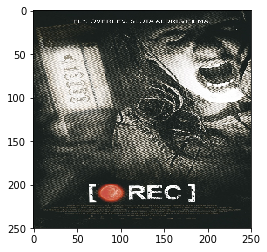

In [26]:
classes = np.array(train.columns[2:])
proba = model.predict(img.reshape(1,250,250,3))
top_3 = np.argsort(proba[0])[:-4:-1]
for i in range(3):
    print("{}".format(classes[top_3[i]])+" ({:.3})".format(proba[0][top_3[i]]))
plt.imshow(img)

In [27]:
img = image.load_img('Grudge.jpg',target_size=(250,250,3))
img = image.img_to_array(img)
img = img/255

Drama (0.518)
Action (0.287)
Thriller (0.243)


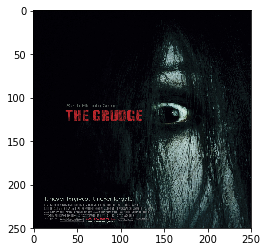

In [28]:
classes = np.array(train.columns[2:])
proba = model.predict(img.reshape(1,250,250,3))
top_3 = np.argsort(proba[0])[:-4:-1]
for i in range(3):
    print("{}".format(classes[top_3[i]])+" ({:.3})".format(proba[0][top_3[i]]))
plt.imshow(img)

In [11]:
model = keras.models.load_model("Trained_model")

Drama (0.518)
Comedy (0.285)
Action (0.22)


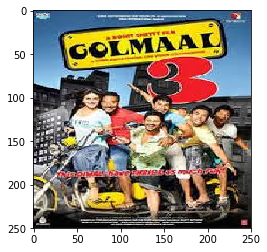

In [29]:
img = image.load_img('golmal.jpeg',target_size=(250,250,3))
img = image.img_to_array(img)
img = img/255

classes = np.array(train.columns[2:])
proba = model.predict(img.reshape(1,250,250,3))
top_3 = np.argsort(proba[0])[:-4:-1]
for i in range(3):
    print("{}".format(classes[top_3[i]])+" ({:.3})".format(proba[0][top_3[i]]))
plt.imshow(img)

In [87]:
model.save("Trained_model_ver2")

Drama (0.519)
Comedy (0.246)
Action (0.24)


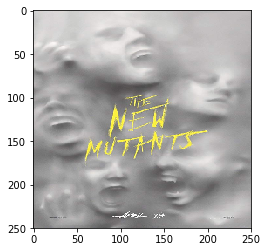

In [33]:
img = image.load_img('4.jpg',target_size=(250,250,3))
img = image.img_to_array(img)
img = img/255

classes = np.array(train.columns[2:])
proba = model.predict(img.reshape(1,250,250,3))
top_3 = np.argsort(proba[0])[:-4:-1]
for i in range(3):
    print("{}".format(classes[top_3[i]])+" ({:.3})".format(proba[0][top_3[i]]))
plt.imshow(img)

Drama (0.519)
Action (0.275)
Thriller (0.225)


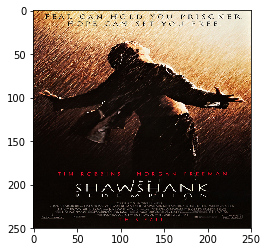

In [35]:
img = image.load_img('9.jpg',target_size=(250,250,3))
img = image.img_to_array(img)
img = img/255

classes = np.array(train.columns[2:])
proba = model.predict(img.reshape(1,250,250,3))
top_3 = np.argsort(proba[0])[:-4:-1]
for i in range(3):
    print("{}".format(classes[top_3[i]])+" ({:.3})".format(proba[0][top_3[i]]))
plt.imshow(img)

In [36]:
model.save("Trained_model_ver3")

In [7]:
model = keras.models.load_model("Trained_model_ver3") 

In [8]:
img = image.load_img('shrek2.jpg',target_size=(250,250,3))
img = image.img_to_array(img)
img = img/255

classes = np.array(train.columns[2:])
proba = model.predict(img.reshape(1,250,250,3))
top_3 = np.argsort(proba[0])[:-4:-1]
for i in range(3):
    print("{}".format(classes[top_3[i]])+" ({:.3})".format(proba[0][top_3[i]]))
plt.imshow(img)

UnknownError: Failed to get convolution algorithm. This is probably because cuDNN failed to initialize, so try looking to see if a warning log message was printed above.
	 [[{{node conv2d_1_1/convolution}} = Conv2D[T=DT_FLOAT, data_format="NCHW", dilations=[1, 1, 1, 1], padding="VALID", strides=[1, 1, 1, 1], use_cudnn_on_gpu=true, _device="/job:localhost/replica:0/task:0/device:GPU:0"](conv2d_1_1/convolution-0-TransposeNHWCToNCHW-LayoutOptimizer, conv2d_1_1/kernel/read)]]